In [6]:
%load_ext autoreload
%autoreload 2

import torch
from pointnet.sh import lm2flat_index,calc_sh
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

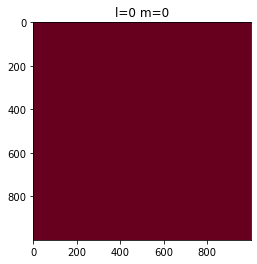

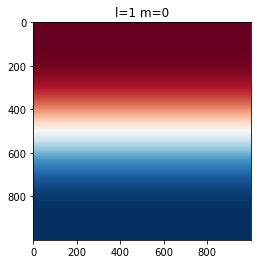

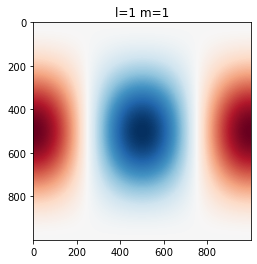

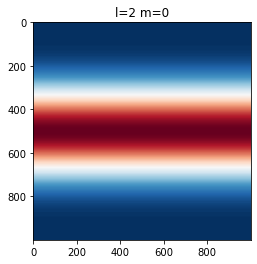

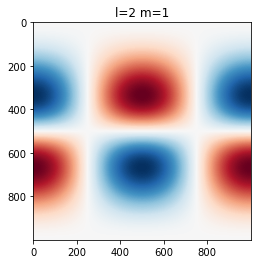

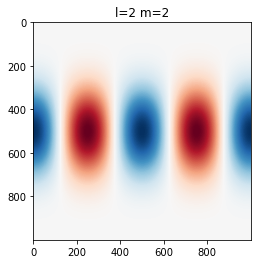

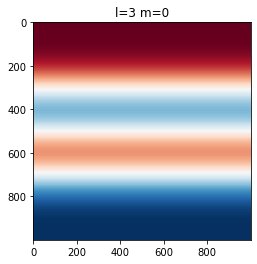

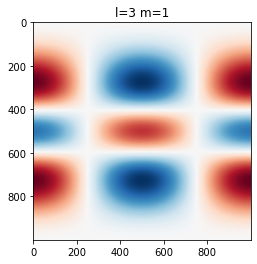

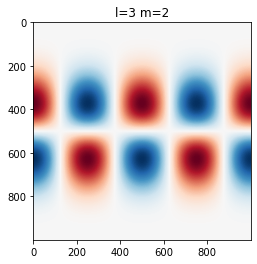

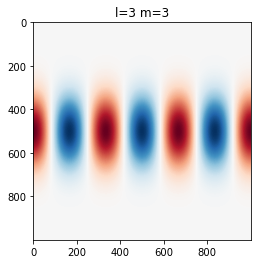

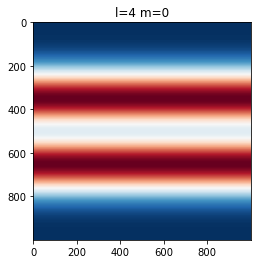

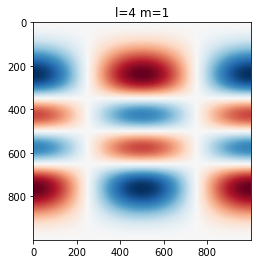

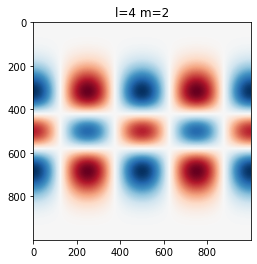

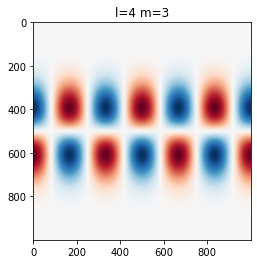

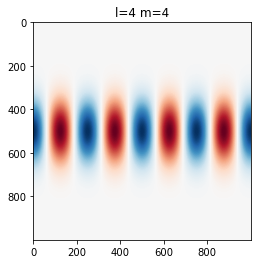

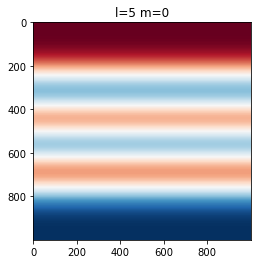

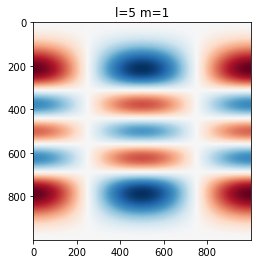

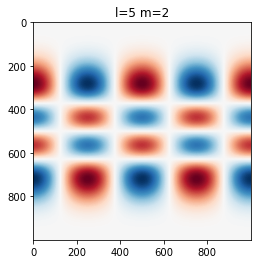

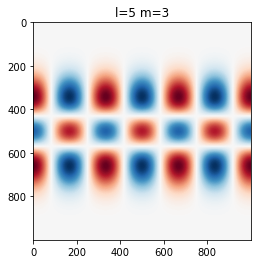

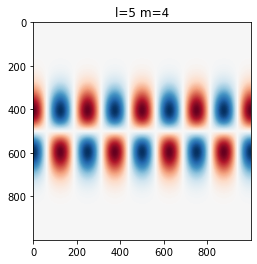

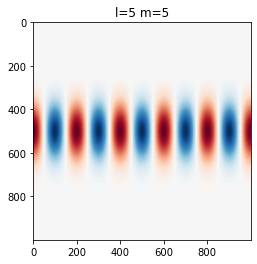

In [53]:
lmax =5
res = 1000
x = torch.arange(0,1,1/res)
x_grid,y_grid = torch.meshgrid([x,x],indexing="xy")
y_grid = y_grid * 2*torch.pi
x_grid = (((x_grid * torch.pi).cos() + 1)/2 * torch.pi)

coords = torch.stack([x_grid,y_grid],dim=-1).flatten(0,1)
y = calc_sh(lmax,coords)
y.shape

for l in range(lmax+1):
    for m in range(l+1):
        target_img = y[:,lm2flat_index(l,m)].reshape(res,res).T

        target_img = ((target_img +1)/2 * 255).clip(0,255).ceil()

        # rs_img = Image.open(f"sh_tests/l={l}_m={m}.png")

        # rs_img = torch.from_numpy(np.array(rs_img)).float()

        # container = torch.empty((res,res*2))
        # container[:,:res] = target_img
        # container[:,res:] = rs_img

        plt.imshow(target_img,cmap="RdBu")
        plt.title(f"l={l} m={m}")
        plt.show()

In [8]:
from plyfile import PlyData, PlyElement

plydata = PlyData.read("sphere.ply")
vertex_data = plydata["vertex"].data

def unpack_data(data, field_names):
    return torch.from_numpy(np.stack([data[key] for key in field_names]).T)

cameras = unpack_data(vertex_data, ["x", "y", "z"])

torch.Size([162, 3])

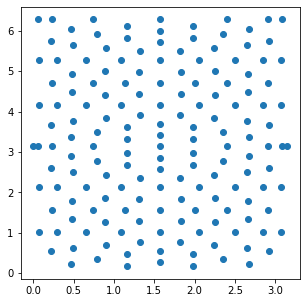

In [46]:
from pointnet.sh import to_spherical

sh_coords = to_spherical(cameras)

plt.figure(figsize=(5,5))
# plt.scatter(sh_coords[:,0],sh_coords[:,1])
plt.scatter((sh_coords[:,0].cos()+1)/2*torch.pi,sh_coords[:,1])

In [83]:
from math import sqrt,ceil,floor
t = [(0,0),(1,0),(1,1),(2,0),(2,1),(2,2),(3,0),(3,1),(3,2),(3,3),(4,0),(4,1),(4,2),(4,3),(4,4)]

[(j,floor((sqrt(8*i+1)-1)/2)) for i,j in enumerate(t)]

[((0, 0), 0),
 ((1, 0), 1),
 ((1, 1), 1),
 ((2, 0), 2),
 ((2, 1), 2),
 ((2, 2), 2),
 ((3, 0), 3),
 ((3, 1), 3),
 ((3, 2), 3),
 ((3, 3), 3),
 ((4, 0), 4),
 ((4, 1), 4),
 ((4, 2), 4),
 ((4, 3), 4),
 ((4, 4), 4)]